#  숫자 손글씨 분류하기

MNIST http://yann.lecun.com/exdb/mnist/

---

## 문제 정의
28X28 픽셀의 손글씨 숫자 이미지를 입력받아서 실제로 의미하는 숫자를 인식해보자

## 가설
784개의 특징 데이터를 구성한 후 머신러닝을 통해 어떤 숫자인지 추측 가능

## 목표
28X28 사이즈의 이미지로부터 label 값을 얻어낼 수 있다

# 데이터 구성
784개 입력 특징(28X28이므로)
**출력 데이터** label
데이터의 총 행수 10000개

# 분석 단계
## 단계 1) 데이터를 불러온다
## 단계 2) EDA & Feature Engineering
## 단계 3) 데이터셋을 구성
## 단계 4) 모델링하고 학습 진행
## 단계 5) 모델을 검증

---
# 1. 데이터를 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/digit.csv')
df.head()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


---
## 2. EDA & Feature Engineering

In [3]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [4]:
df.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0,4.453400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0,2.884451
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,9.000000


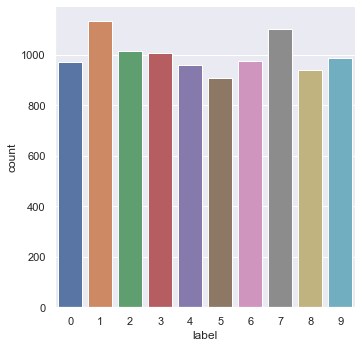

In [5]:
sns.catplot(data = df, x = 'label', kind = 'count')

## 이미지 살펴보기

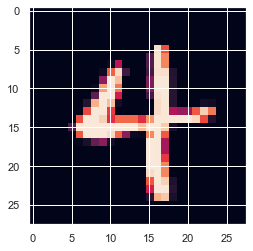

In [6]:
numbers = df.drop(['label'], axis = 1)

nth = 0 # 0~9999 바꾸면서 살펴보기
img = np.reshape(numbers.iloc[nth].values, [28, 28])
plt.imshow(img)
plt.show()

-----
# 3. data set 구성하기

In [7]:
input_data = df.drop('label', axis = 1)
target_data = df['label']

print(input_data.shape, target_data.shape)

(10000, 784) (10000,)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size = 0.2)

print(x_train.shape, x_test.shape)

(8000, 784) (2000, 784)


---
# 4. 모델링 & 학습

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)

In [10]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
print('training set accuracy:', forest.score(x_train, y_train))

training set accuracy: 1.0


## SVM

In [14]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
print('training set accuracy:', model.score(x_train, y_train))

training set accuracy: 0.986


---
# 5. 모델 검증

In [15]:
print('RT: test set accuracy:', forest.score(x_test, y_test))

RT: test set accuracy: 0.955


In [16]:
print('SVM: training set accuracy:', model.score(x_test, y_test))

SVM: training set accuracy: 0.96


## 실제 예측 결과물 살펴보기

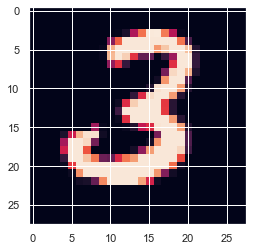

---인식된 숫자는? [3] 입니다


In [13]:
import random

n = random.randrange(0, len(x_test))

img = np.reshape(x_test.iloc[n].values, [ 28, 28 ])
plt.imshow(img)
plt.show()

result = forest.predict([ x_test.iloc[n].values ])
print('---인식된 숫자는?', result, '입니다')